# K Nearest Neighbours

## Importing Dependencies

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [22]:
df=pd.read_csv('Iris.csv')
df.head()
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
28,29,5.2,3.4,1.4,0.2,Iris-setosa
101,102,5.8,2.7,5.1,1.9,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [23]:
df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Assign codes to different classes

In [24]:
df['class'] = np.where(df['Species'] == 'Iris-setosa', 1, np.where(df['Species'] == 'Iris-versicolor', 2, 3))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


## Separate Predictors and Response

In [25]:
X=df.drop(columns=['Id','Species','class'])
Y=df['class']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Defining KNN function

In [26]:
#defining euclidean distance first

def e_dist(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

In [27]:
def KNN(X_train,Y_train,x_test,k): # KNN for each test value
    distances=[]
    labels=[]
    for x in X_train:
        distances.append(e_dist(x,x_test)) #find euclidean distance between each test value and all train values
    #get the first k indices of the sorted array in increasing order
    k_indices=np.argsort(distances)[:k]
    # get the labels index wise
    for index in k_indices:
        labels.append(Y_train[index])
    # Majority Voting
    return max(set(labels),key=labels.count) #Calls .count() only on unique labels, making it faster

## Splitting Train test data

### 80-20 Split

In [28]:
#80% train, 20%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
Y_train.head()

22    1
15    1
65    2
11    1
42    1
Name: class, dtype: int32

In [29]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1])

#### Calculating test accuracy

In [30]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

100.0

### 70-30 Split

In [31]:
#70% train, 30%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [33]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1])

#### Calculating test accuracy

In [34]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

100.0

### 60-40 Split

In [35]:
#60% train, 40%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [36]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 2, 1, 1, 1, 2])

#### Calculating test accuracy

In [37]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

98.33333333333333

### 50-50 Split

In [38]:
#50% train, 50%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [39]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 3, 1, 2, 3, 1, 2, 3, 2])

#### Calculating test accuracy

In [40]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

94.66666666666667

### K vs Accuracy (for 80-20 Split)

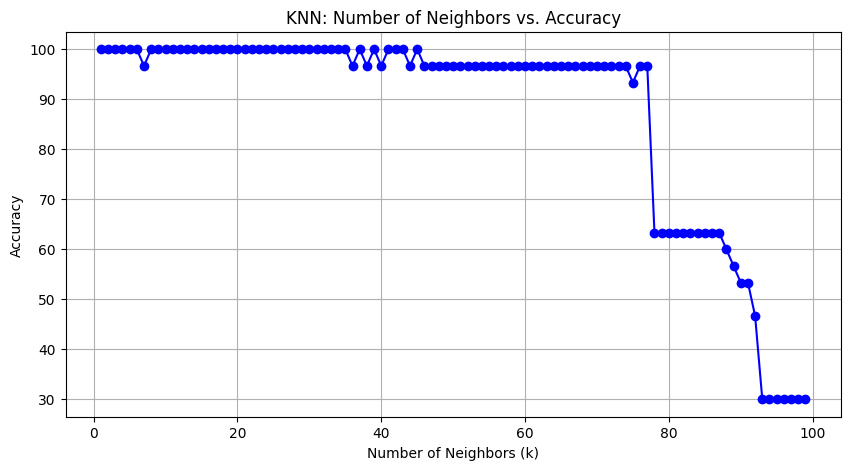

In [49]:
#80% train, 20%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

accuracy=[]
k_values= range(1,100)
for k in k_values: 
    y_hat=[]
    for x_test in X_test.to_numpy():
        y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k))
    accuracy.append(np.mean(np.array(y_hat)==Y_test.to_numpy())*100)

# Plot k vs Accuracy
title = "KNN: Number of Neighbors vs. Accuracy"
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title(title)
plt.grid()
plt.show()
